# Simulate with Gym-Eplus

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, pickle, sys

import gym, eplus_env

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from utils import make_dict

In [4]:
# Modify here: Outputs from EnergyPlus; Match the variables.cfg file.
obs_name = [
    "Outdoor Temp.", 
    "Outdoor RH", 
    "Wind Speed", 
    "Wind Direction",
    "Diff. Solar Rad.",
    "Direct Solar Rad.", 
    "Htg SP", 
    "Clg SP", 
    "Indoor Temp.", 
    "Indoor Temp. Setpoint",
    "PPD", 
    "Occupancy Flag",
    "Coil Power",
    "HVAC Power", 
    "Sys In Temp.", 
    "Sys In Mdot", 
    "OA Temp.", 
    "OA Mdot", 
    "MA Temp.", 
    "MA Mdot", 
    "Sys Out Temp.", 
    "Sys Out Mdot"
]
dist_name = ["Outdoor Temp.", "Outdoor RH", "Wind Speed", "Wind Direction", "Diff. Solar Rad.", "Direct Solar Rad.", "Indoor Temp. Setpoint", "Occupancy Flag"]

env = gym.make('5Zone-sim_TMY3-v0');

In [5]:
# Reset the env (creat the EnergyPlus subprocess)
timeStep, obs, isTerminal = env.reset();
obs_dict = make_dict(obs_name, obs)
start_time = pd.datetime(year = env.start_year, month = env.start_mon, day = env.start_day)
print(start_time)

timeStamp = [start_time]
observations = [obs]
actions = []

for i in range(91*96):
    # Using EnergyPlus default control strategy;
    action = ()
    timeStep, obs, isTerminal = env.step(action)
    obs_dict = make_dict(obs_name, obs)
    cur_time = start_time + pd.Timedelta(seconds = timeStep)
    
    print("{}:  Sys Out: {:.2f}({:.2f})-> OA: {:.2f}({:.2f})-> MA: {:.2f}({:.2f})-> Sys Out: {:.2f}({:.2f})-> Zone Temp: {:.2f}".format(cur_time,
                                                    obs_dict["Sys In Temp."], obs_dict["Sys In Mdot"],obs_dict["OA Temp."], obs_dict["OA Mdot"],
                                                    obs_dict["MA Temp."], obs_dict["MA Mdot"], obs_dict["Sys Out Temp."], obs_dict["Sys Out Mdot"],
                                                    obs_dict["Indoor Temp."]))

    timeStamp.append(cur_time)
    observations.append(obs)
    #actions.append(action)
    
# Save Observations
obs_df = pd.DataFrame(np.array(observations), index = np.array(timeStamp), columns = obs_name)
dist_df = obs_df[dist_name]

results_dir = 'simulation_results'
if not os.path.exists(results_dir):
    os.mkdir(results_dir)

obs_df.to_pickle(os.path.join(results_dir, "Sim-TMY3.pkl"))
dist_df.to_pickle(os.path.join(results_dir, "Dist-TMY3.pkl"))
print("Saved!")

env.end_env() # Safe termination of the environment after use.

[2020-09-18 14:00:03,369] EPLUS_ENV_5Zone-sim-v0_MainThread_ROOT INFO:Creating EnergyPlus simulation environment...
[2020-09-18 14:00:03,379] EPLUS_ENV_5Zone-sim-v0_MainThread_ROOT INFO:EnergyPlus working directory is in /Users/Gaby/Documents/uofa/hvac_control/Building_Co-simulation_Platform/gnu_rl_example/paper_example/Eplus-env-5Zone-sim-v0-res3/Eplus-env-sub_run1


1991-01-01 00:00:00
1991-01-01 00:15:00:  Sys Out: 13.99(1.70)-> OA: 1.80(0.27)-> MA: 12.05(1.70)-> Sys Out: 12.44(1.70)-> Zone Temp: 13.53
1991-01-01 00:30:00:  Sys Out: 13.85(1.70)-> OA: 3.60(0.27)-> MA: 12.21(1.70)-> Sys Out: 12.60(1.70)-> Zone Temp: 13.51
1991-01-01 00:45:00:  Sys Out: 13.73(1.07)-> OA: 5.40(0.27)-> MA: 11.62(1.07)-> Sys Out: 12.01(1.07)-> Zone Temp: 13.57
1991-01-01 01:00:00:  Sys Out: 13.65(0.92)-> OA: 7.20(0.27)-> MA: 11.75(0.92)-> Sys Out: 11.97(0.92)-> Zone Temp: 13.64
1991-01-01 01:15:00:  Sys Out: 13.58(0.96)-> OA: 7.20(0.27)-> MA: 11.78(0.96)-> Sys Out: 12.01(0.96)-> Zone Temp: 13.75
1991-01-01 01:30:00:  Sys Out: 13.55(0.97)-> OA: 7.20(0.27)-> MA: 11.77(0.97)-> Sys Out: 12.00(0.97)-> Zone Temp: 13.82
1991-01-01 01:45:00:  Sys Out: 13.53(0.98)-> OA: 7.20(0.27)-> MA: 11.77(0.98)-> Sys Out: 12.00(0.98)-> Zone Temp: 13.86
1991-01-01 02:00:00:  Sys Out: 13.51(0.98)-> OA: 7.20(0.27)-> MA: 11.77(0.98)-> Sys Out: 12.00(0.98)-> Zone Temp: 13.89
1991-01-01 02:15:00:

1991-01-03 12:00:00:  Sys Out: 19.38(2.96)-> OA: -5.00(0.47)-> MA: 15.50(2.96)-> Sys Out: 19.22(2.96)-> Zone Temp: 20.23
1991-01-03 12:15:00:  Sys Out: 19.63(2.96)-> OA: -4.88(0.47)-> MA: 15.73(2.96)-> Sys Out: 19.45(2.96)-> Zone Temp: 20.43
1991-01-03 12:30:00:  Sys Out: 20.02(2.96)-> OA: -4.75(0.47)-> MA: 16.08(2.96)-> Sys Out: 19.80(2.96)-> Zone Temp: 20.61
1991-01-03 12:45:00:  Sys Out: 20.21(2.96)-> OA: -4.62(0.47)-> MA: 16.26(2.96)-> Sys Out: 18.95(2.96)-> Zone Temp: 20.90
1991-01-03 13:00:00:  Sys Out: 20.27(2.96)-> OA: -4.50(0.47)-> MA: 16.33(2.96)-> Sys Out: 17.99(2.96)-> Zone Temp: 20.91
1991-01-03 13:15:00:  Sys Out: 20.31(2.96)-> OA: -4.22(0.47)-> MA: 16.41(2.96)-> Sys Out: 18.59(2.96)-> Zone Temp: 20.33
1991-01-03 13:30:00:  Sys Out: 20.44(2.96)-> OA: -3.95(0.47)-> MA: 16.56(2.96)-> Sys Out: 18.74(2.96)-> Zone Temp: 20.27
1991-01-03 13:45:00:  Sys Out: 20.45(2.96)-> OA: -3.67(0.47)-> MA: 16.61(2.96)-> Sys Out: 18.79(2.96)-> Zone Temp: 20.27
1991-01-03 14:00:00:  Sys Out: 2

1991-01-05 18:30:00:  Sys Out: 19.44(1.70)-> OA: -9.50(0.27)-> MA: 14.84(1.70)-> Sys Out: 15.23(1.70)-> Zone Temp: 18.72
1991-01-05 18:45:00:  Sys Out: 18.44(1.70)-> OA: -9.50(0.27)-> MA: 14.00(1.70)-> Sys Out: 14.38(1.70)-> Zone Temp: 17.28
1991-01-05 19:00:00:  Sys Out: 17.55(1.70)-> OA: -9.50(0.27)-> MA: 13.25(1.70)-> Sys Out: 13.64(1.70)-> Zone Temp: 16.15
1991-01-05 19:15:00:  Sys Out: 16.87(1.70)-> OA: -9.62(0.27)-> MA: 12.66(1.70)-> Sys Out: 13.05(1.70)-> Zone Temp: 15.25
1991-01-05 19:30:00:  Sys Out: 16.11(1.70)-> OA: -9.75(0.27)-> MA: 11.99(1.70)-> Sys Out: 12.38(1.70)-> Zone Temp: 14.54
1991-01-05 19:45:00:  Sys Out: 15.60(1.70)-> OA: -9.88(0.27)-> MA: 11.55(1.70)-> Sys Out: 11.94(1.70)-> Zone Temp: 13.91
1991-01-05 20:00:00:  Sys Out: 15.03(1.70)-> OA: -10.00(0.27)-> MA: 11.05(1.70)-> Sys Out: 11.64(1.70)-> Zone Temp: 13.43
1991-01-05 20:15:00:  Sys Out: 14.47(1.70)-> OA: -10.15(0.27)-> MA: 10.55(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 13.01
1991-01-05 20:30:00:  Sys Out:

1991-01-08 06:45:00:  Sys Out: 12.23(1.70)-> OA: -4.50(0.27)-> MA: 9.57(1.70)-> Sys Out: 12.86(1.70)-> Zone Temp: 12.81
1991-01-08 07:00:00:  Sys Out: 12.23(1.70)-> OA: -4.50(0.27)-> MA: 9.57(1.70)-> Sys Out: 12.88(1.70)-> Zone Temp: 12.81
1991-01-08 07:15:00:  Sys Out: 12.23(1.70)-> OA: -4.50(0.27)-> MA: 9.57(1.70)-> Sys Out: 15.31(1.70)-> Zone Temp: 12.81
1991-01-08 07:30:00:  Sys Out: 12.35(1.70)-> OA: -4.50(0.27)-> MA: 9.67(1.70)-> Sys Out: 15.42(1.70)-> Zone Temp: 13.34
1991-01-08 07:45:00:  Sys Out: 12.54(1.70)-> OA: -4.50(0.27)-> MA: 9.82(1.70)-> Sys Out: 15.57(1.70)-> Zone Temp: 13.65
1991-01-08 08:00:00:  Sys Out: 12.68(1.70)-> OA: -4.50(0.27)-> MA: 9.94(1.70)-> Sys Out: 15.69(1.70)-> Zone Temp: 13.84
1991-01-08 08:15:00:  Sys Out: 13.38(2.96)-> OA: -4.35(0.47)-> MA: 10.56(2.96)-> Sys Out: 14.28(2.96)-> Zone Temp: 14.02
1991-01-08 08:30:00:  Sys Out: 14.31(2.96)-> OA: -4.20(0.47)-> MA: 11.36(2.96)-> Sys Out: 15.08(2.96)-> Zone Temp: 15.35
1991-01-08 08:45:00:  Sys Out: 14.99(2

1991-01-10 16:30:00:  Sys Out: 20.66(2.96)-> OA: -3.90(0.47)-> MA: 16.75(2.96)-> Sys Out: 18.93(2.96)-> Zone Temp: 20.75
1991-01-10 16:45:00:  Sys Out: 20.65(2.96)-> OA: -3.90(0.47)-> MA: 16.74(2.96)-> Sys Out: 18.92(2.96)-> Zone Temp: 20.75
1991-01-10 17:00:00:  Sys Out: 20.64(2.96)-> OA: -3.90(0.47)-> MA: 16.74(2.96)-> Sys Out: 18.91(2.96)-> Zone Temp: 20.74
1991-01-10 17:15:00:  Sys Out: 20.63(2.96)-> OA: -3.90(0.47)-> MA: 16.73(2.96)-> Sys Out: 18.90(2.96)-> Zone Temp: 20.74
1991-01-10 17:30:00:  Sys Out: 20.60(2.96)-> OA: -3.90(0.47)-> MA: 16.71(2.96)-> Sys Out: 18.88(2.96)-> Zone Temp: 20.68
1991-01-10 17:45:00:  Sys Out: 20.57(2.96)-> OA: -3.90(0.47)-> MA: 16.68(2.96)-> Sys Out: 18.85(2.96)-> Zone Temp: 20.65
1991-01-10 18:00:00:  Sys Out: 20.54(2.96)-> OA: -3.90(0.47)-> MA: 16.65(2.96)-> Sys Out: 18.83(2.96)-> Zone Temp: 20.61
1991-01-10 18:15:00:  Sys Out: 20.00(1.70)-> OA: -3.90(0.27)-> MA: 16.20(1.70)-> Sys Out: 16.58(1.70)-> Zone Temp: 20.58
1991-01-10 18:30:00:  Sys Out: 1

1991-01-13 06:00:00:  Sys Out: 17.70(0.37)-> OA: 13.30(0.37)-> MA: 13.30(0.37)-> Sys Out: 13.79(0.37)-> Zone Temp: 17.49
1991-01-13 06:15:00:  Sys Out: 17.67(0.37)-> OA: 13.30(0.37)-> MA: 13.30(0.37)-> Sys Out: 13.79(0.37)-> Zone Temp: 17.45
1991-01-13 06:30:00:  Sys Out: 17.63(0.37)-> OA: 13.30(0.37)-> MA: 13.30(0.37)-> Sys Out: 13.79(0.37)-> Zone Temp: 17.41
1991-01-13 06:45:00:  Sys Out: 17.59(0.37)-> OA: 13.30(0.37)-> MA: 13.30(0.37)-> Sys Out: 13.79(0.37)-> Zone Temp: 17.37
1991-01-13 07:00:00:  Sys Out: 17.55(0.37)-> OA: 13.30(0.37)-> MA: 13.30(0.37)-> Sys Out: 13.79(0.37)-> Zone Temp: 17.34
1991-01-13 07:15:00:  Sys Out: 17.60(1.70)-> OA: 13.03(0.27)-> MA: 16.87(1.70)-> Sys Out: 22.55(1.70)-> Zone Temp: 17.31
1991-01-13 07:30:00:  Sys Out: 18.11(1.70)-> OA: 12.75(0.27)-> MA: 17.26(1.70)-> Sys Out: 22.94(1.70)-> Zone Temp: 18.95
1991-01-13 07:45:00:  Sys Out: 18.53(1.70)-> OA: 12.47(0.27)-> MA: 17.56(1.70)-> Sys Out: 23.25(1.70)-> Zone Temp: 19.68
1991-01-13 08:00:00:  Sys Out: 1

1991-01-15 07:15:00:  Sys Out: 18.51(1.70)-> OA: 15.00(0.27)-> MA: 17.95(1.70)-> Sys Out: 23.61(1.70)-> Zone Temp: 18.13
1991-01-15 07:30:00:  Sys Out: 19.06(1.70)-> OA: 15.00(0.27)-> MA: 18.41(1.70)-> Sys Out: 24.07(1.70)-> Zone Temp: 19.79
1991-01-15 07:45:00:  Sys Out: 19.35(1.70)-> OA: 15.00(0.27)-> MA: 18.66(1.70)-> Sys Out: 24.06(1.70)-> Zone Temp: 20.62
1991-01-15 08:00:00:  Sys Out: 19.75(1.70)-> OA: 15.00(0.27)-> MA: 18.99(1.70)-> Sys Out: 22.96(1.70)-> Zone Temp: 21.03
1991-01-15 08:15:00:  Sys Out: 20.07(0.56)-> OA: 15.00(0.56)-> MA: 15.00(0.56)-> Sys Out: 15.32(0.56)-> Zone Temp: 21.08
1991-01-15 08:30:00:  Sys Out: 20.36(0.56)-> OA: 15.00(0.56)-> MA: 15.00(0.56)-> Sys Out: 15.32(0.56)-> Zone Temp: 21.66
1991-01-15 08:45:00:  Sys Out: 20.69(0.56)-> OA: 15.00(0.56)-> MA: 15.00(0.56)-> Sys Out: 15.32(0.56)-> Zone Temp: 22.18
1991-01-15 09:00:00:  Sys Out: 21.03(0.56)-> OA: 15.00(0.56)-> MA: 15.00(0.56)-> Sys Out: 15.32(0.56)-> Zone Temp: 22.60
1991-01-15 09:15:00:  Sys Out: 2

1991-01-17 18:45:00:  Sys Out: 19.22(1.70)-> OA: 1.10(0.27)-> MA: 16.34(1.70)-> Sys Out: 16.72(1.70)-> Zone Temp: 18.57
1991-01-17 19:00:00:  Sys Out: 18.72(1.70)-> OA: 1.10(0.27)-> MA: 15.92(1.70)-> Sys Out: 16.30(1.70)-> Zone Temp: 17.80
1991-01-17 19:15:00:  Sys Out: 18.08(1.70)-> OA: 1.10(0.27)-> MA: 15.38(1.70)-> Sys Out: 15.76(1.70)-> Zone Temp: 17.22
1991-01-17 19:30:00:  Sys Out: 17.72(1.70)-> OA: 1.10(0.27)-> MA: 15.08(1.70)-> Sys Out: 15.46(1.70)-> Zone Temp: 16.73
1991-01-17 19:45:00:  Sys Out: 17.35(1.70)-> OA: 1.10(0.27)-> MA: 14.76(1.70)-> Sys Out: 15.15(1.70)-> Zone Temp: 16.37
1991-01-17 20:00:00:  Sys Out: 16.93(1.70)-> OA: 1.10(0.27)-> MA: 14.41(1.70)-> Sys Out: 14.79(1.70)-> Zone Temp: 16.04
1991-01-17 20:15:00:  Sys Out: 16.59(1.70)-> OA: 1.23(0.27)-> MA: 14.14(1.70)-> Sys Out: 14.53(1.70)-> Zone Temp: 15.73
1991-01-17 20:30:00:  Sys Out: 16.30(1.70)-> OA: 1.35(0.27)-> MA: 13.92(1.70)-> Sys Out: 14.30(1.70)-> Zone Temp: 15.47
1991-01-17 20:45:00:  Sys Out: 16.12(1.7

1991-01-20 03:30:00:  Sys Out: 15.08(0.69)-> OA: 6.60(0.27)-> MA: 11.74(0.69)-> Sys Out: 12.00(0.69)-> Zone Temp: 14.87
1991-01-20 03:45:00:  Sys Out: 15.01(0.70)-> OA: 6.60(0.27)-> MA: 11.74(0.70)-> Sys Out: 12.00(0.70)-> Zone Temp: 14.83
1991-01-20 04:00:00:  Sys Out: 14.95(0.71)-> OA: 6.60(0.27)-> MA: 11.74(0.71)-> Sys Out: 12.00(0.71)-> Zone Temp: 14.79
1991-01-20 04:15:00:  Sys Out: 14.88(0.72)-> OA: 6.60(0.27)-> MA: 11.75(0.72)-> Sys Out: 12.00(0.72)-> Zone Temp: 14.75
1991-01-20 04:30:00:  Sys Out: 14.82(0.73)-> OA: 6.60(0.27)-> MA: 11.75(0.73)-> Sys Out: 12.00(0.73)-> Zone Temp: 14.72
1991-01-20 04:45:00:  Sys Out: 14.76(0.74)-> OA: 6.60(0.27)-> MA: 11.75(0.74)-> Sys Out: 12.00(0.74)-> Zone Temp: 14.70
1991-01-20 05:00:00:  Sys Out: 14.71(0.74)-> OA: 6.60(0.27)-> MA: 11.76(0.74)-> Sys Out: 12.00(0.74)-> Zone Temp: 14.68
1991-01-20 05:15:00:  Sys Out: 14.66(0.78)-> OA: 6.32(0.27)-> MA: 11.76(0.78)-> Sys Out: 11.99(0.78)-> Zone Temp: 14.66
1991-01-20 05:30:00:  Sys Out: 14.62(0.8

1991-01-22 08:45:00:  Sys Out: 14.35(2.96)-> OA: -6.70(0.47)-> MA: 11.00(2.96)-> Sys Out: 14.72(2.96)-> Zone Temp: 15.52
1991-01-22 09:00:00:  Sys Out: 15.05(2.96)-> OA: -6.70(0.47)-> MA: 11.59(2.96)-> Sys Out: 15.31(2.96)-> Zone Temp: 16.18
1991-01-22 09:15:00:  Sys Out: 15.70(2.96)-> OA: -6.42(0.47)-> MA: 12.18(2.96)-> Sys Out: 15.90(2.96)-> Zone Temp: 16.81
1991-01-22 09:30:00:  Sys Out: 16.29(2.96)-> OA: -6.15(0.47)-> MA: 12.72(2.96)-> Sys Out: 16.44(2.96)-> Zone Temp: 17.45
1991-01-22 09:45:00:  Sys Out: 16.69(2.96)-> OA: -5.87(0.47)-> MA: 13.10(2.96)-> Sys Out: 16.82(2.96)-> Zone Temp: 18.08
1991-01-22 10:00:00:  Sys Out: 17.15(2.96)-> OA: -5.60(0.47)-> MA: 13.53(2.96)-> Sys Out: 17.25(2.96)-> Zone Temp: 18.45
1991-01-22 10:15:00:  Sys Out: 17.63(2.96)-> OA: -5.60(0.47)-> MA: 13.93(2.96)-> Sys Out: 17.65(2.96)-> Zone Temp: 18.81
1991-01-22 10:30:00:  Sys Out: 18.03(2.96)-> OA: -5.60(0.47)-> MA: 14.27(2.96)-> Sys Out: 17.99(2.96)-> Zone Temp: 19.12
1991-01-22 10:45:00:  Sys Out: 1

1991-01-24 19:30:00:  Sys Out: 16.59(1.70)-> OA: -3.90(0.27)-> MA: 13.33(1.70)-> Sys Out: 13.72(1.70)-> Zone Temp: 15.32
1991-01-24 19:45:00:  Sys Out: 16.11(1.70)-> OA: -3.90(0.27)-> MA: 12.92(1.70)-> Sys Out: 13.31(1.70)-> Zone Temp: 14.91
1991-01-24 20:00:00:  Sys Out: 15.64(1.70)-> OA: -3.90(0.27)-> MA: 12.53(1.70)-> Sys Out: 12.92(1.70)-> Zone Temp: 14.52
1991-01-24 20:15:00:  Sys Out: 15.24(1.70)-> OA: -3.90(0.27)-> MA: 12.19(1.70)-> Sys Out: 12.58(1.70)-> Zone Temp: 14.18
1991-01-24 20:30:00:  Sys Out: 14.84(1.70)-> OA: -3.90(0.27)-> MA: 11.86(1.70)-> Sys Out: 12.24(1.70)-> Zone Temp: 13.86
1991-01-24 20:45:00:  Sys Out: 14.51(1.70)-> OA: -3.90(0.27)-> MA: 11.58(1.70)-> Sys Out: 11.96(1.70)-> Zone Temp: 13.57
1991-01-24 21:00:00:  Sys Out: 14.20(1.70)-> OA: -3.90(0.27)-> MA: 11.32(1.70)-> Sys Out: 11.71(1.70)-> Zone Temp: 13.31
1991-01-24 21:15:00:  Sys Out: 14.02(1.70)-> OA: -3.90(0.27)-> MA: 11.17(1.70)-> Sys Out: 11.55(1.70)-> Zone Temp: 13.13
1991-01-24 21:30:00:  Sys Out: 1

1991-01-27 08:45:00:  Sys Out: 14.07(2.96)-> OA: -8.68(0.47)-> MA: 10.45(2.96)-> Sys Out: 14.17(2.96)-> Zone Temp: 15.22
1991-01-27 09:00:00:  Sys Out: 14.74(2.96)-> OA: -8.40(0.47)-> MA: 11.06(2.96)-> Sys Out: 14.78(2.96)-> Zone Temp: 15.86
1991-01-27 09:15:00:  Sys Out: 15.36(2.96)-> OA: -7.97(0.47)-> MA: 11.64(2.96)-> Sys Out: 15.36(2.96)-> Zone Temp: 16.45
1991-01-27 09:30:00:  Sys Out: 15.75(2.96)-> OA: -7.55(0.47)-> MA: 12.04(2.96)-> Sys Out: 15.76(2.96)-> Zone Temp: 17.02
1991-01-27 09:45:00:  Sys Out: 16.20(2.96)-> OA: -7.12(0.47)-> MA: 12.48(2.96)-> Sys Out: 16.21(2.96)-> Zone Temp: 17.45
1991-01-27 10:00:00:  Sys Out: 16.71(2.96)-> OA: -6.70(0.47)-> MA: 12.98(2.96)-> Sys Out: 16.70(2.96)-> Zone Temp: 17.91
1991-01-27 10:15:00:  Sys Out: 17.19(2.96)-> OA: -6.28(0.47)-> MA: 13.45(2.96)-> Sys Out: 17.17(2.96)-> Zone Temp: 18.40
1991-01-27 10:30:00:  Sys Out: 17.66(2.96)-> OA: -5.85(0.47)-> MA: 13.92(2.96)-> Sys Out: 17.64(2.96)-> Zone Temp: 18.88
1991-01-27 10:45:00:  Sys Out: 1

1991-01-29 19:00:00:  Sys Out: 20.94(1.70)-> OA: 0.00(0.27)-> MA: 17.61(1.70)-> Sys Out: 18.00(1.70)-> Zone Temp: 19.35
1991-01-29 19:15:00:  Sys Out: 20.29(1.70)-> OA: -0.17(0.27)-> MA: 17.04(1.70)-> Sys Out: 17.42(1.70)-> Zone Temp: 18.77
1991-01-29 19:30:00:  Sys Out: 19.84(1.70)-> OA: -0.35(0.27)-> MA: 16.63(1.70)-> Sys Out: 17.02(1.70)-> Zone Temp: 18.21
1991-01-29 19:45:00:  Sys Out: 19.32(1.70)-> OA: -0.52(0.27)-> MA: 16.17(1.70)-> Sys Out: 16.55(1.70)-> Zone Temp: 17.77
1991-01-29 20:00:00:  Sys Out: 18.80(1.70)-> OA: -0.70(0.27)-> MA: 15.70(1.70)-> Sys Out: 16.09(1.70)-> Zone Temp: 17.32
1991-01-29 20:15:00:  Sys Out: 18.33(1.70)-> OA: -0.82(0.27)-> MA: 15.28(1.70)-> Sys Out: 15.67(1.70)-> Zone Temp: 16.91
1991-01-29 20:30:00:  Sys Out: 17.88(1.70)-> OA: -0.95(0.27)-> MA: 14.89(1.70)-> Sys Out: 15.27(1.70)-> Zone Temp: 16.52
1991-01-29 20:45:00:  Sys Out: 17.46(1.70)-> OA: -1.07(0.27)-> MA: 14.51(1.70)-> Sys Out: 14.90(1.70)-> Zone Temp: 16.15
1991-01-29 21:00:00:  Sys Out: 17

1991-02-01 08:30:00:  Sys Out: 12.73(2.96)-> OA: -14.50(0.47)-> MA: 8.39(2.96)-> Sys Out: 12.12(2.96)-> Zone Temp: 13.68
1991-02-01 08:45:00:  Sys Out: 13.39(2.96)-> OA: -14.25(0.47)-> MA: 8.99(2.96)-> Sys Out: 12.71(2.96)-> Zone Temp: 14.62
1991-02-01 09:00:00:  Sys Out: 14.12(2.96)-> OA: -14.00(0.47)-> MA: 9.64(2.96)-> Sys Out: 13.37(2.96)-> Zone Temp: 15.40
1991-02-01 09:15:00:  Sys Out: 14.79(2.96)-> OA: -13.50(0.47)-> MA: 10.28(2.96)-> Sys Out: 14.01(2.96)-> Zone Temp: 16.13
1991-02-01 09:30:00:  Sys Out: 15.28(2.96)-> OA: -13.00(0.47)-> MA: 10.78(2.96)-> Sys Out: 14.50(2.96)-> Zone Temp: 16.87
1991-02-01 09:45:00:  Sys Out: 15.87(2.96)-> OA: -12.50(0.47)-> MA: 11.36(2.96)-> Sys Out: 15.08(2.96)-> Zone Temp: 17.53
1991-02-01 10:00:00:  Sys Out: 16.31(2.96)-> OA: -12.00(0.47)-> MA: 11.80(2.96)-> Sys Out: 15.52(2.96)-> Zone Temp: 18.13
1991-02-01 10:15:00:  Sys Out: 16.81(2.96)-> OA: -11.25(0.47)-> MA: 12.35(2.96)-> Sys Out: 16.07(2.96)-> Zone Temp: 18.62
1991-02-01 10:30:00:  Sys O

1991-02-03 18:30:00:  Sys Out: 19.88(1.70)-> OA: 0.00(0.27)-> MA: 16.72(1.70)-> Sys Out: 17.11(1.70)-> Zone Temp: 19.14
1991-02-03 18:45:00:  Sys Out: 19.26(1.70)-> OA: -0.50(0.27)-> MA: 16.12(1.70)-> Sys Out: 16.51(1.70)-> Zone Temp: 18.15
1991-02-03 19:00:00:  Sys Out: 18.52(1.70)-> OA: -1.00(0.27)-> MA: 15.42(1.70)-> Sys Out: 15.81(1.70)-> Zone Temp: 17.41
1991-02-03 19:15:00:  Sys Out: 18.10(1.70)-> OA: -1.00(0.27)-> MA: 15.07(1.70)-> Sys Out: 15.45(1.70)-> Zone Temp: 16.75
1991-02-03 19:30:00:  Sys Out: 17.61(1.70)-> OA: -1.00(0.27)-> MA: 14.66(1.70)-> Sys Out: 15.04(1.70)-> Zone Temp: 16.29
1991-02-03 19:45:00:  Sys Out: 17.11(1.70)-> OA: -1.00(0.27)-> MA: 14.23(1.70)-> Sys Out: 14.62(1.70)-> Zone Temp: 15.88
1991-02-03 20:00:00:  Sys Out: 16.69(1.70)-> OA: -1.00(0.27)-> MA: 13.88(1.70)-> Sys Out: 14.27(1.70)-> Zone Temp: 15.51
1991-02-03 20:15:00:  Sys Out: 16.31(1.70)-> OA: -1.00(0.27)-> MA: 13.56(1.70)-> Sys Out: 13.94(1.70)-> Zone Temp: 15.18
1991-02-03 20:30:00:  Sys Out: 15

1991-02-06 00:15:00:  Sys Out: 13.68(1.70)-> OA: 0.25(0.27)-> MA: 11.54(1.70)-> Sys Out: 11.92(1.70)-> Zone Temp: 13.29
1991-02-06 00:30:00:  Sys Out: 13.54(1.70)-> OA: 0.50(0.27)-> MA: 11.46(1.70)-> Sys Out: 11.85(1.70)-> Zone Temp: 13.21
1991-02-06 00:45:00:  Sys Out: 13.42(1.70)-> OA: 0.75(0.27)-> MA: 11.40(1.70)-> Sys Out: 11.78(1.70)-> Zone Temp: 13.14
1991-02-06 01:00:00:  Sys Out: 13.31(1.70)-> OA: 1.00(0.27)-> MA: 11.34(1.70)-> Sys Out: 11.73(1.70)-> Zone Temp: 13.08
1991-02-06 01:15:00:  Sys Out: 13.20(1.70)-> OA: 1.00(0.27)-> MA: 11.26(1.70)-> Sys Out: 11.64(1.70)-> Zone Temp: 13.03
1991-02-06 01:30:00:  Sys Out: 13.11(1.70)-> OA: 1.00(0.27)-> MA: 11.18(1.70)-> Sys Out: 11.57(1.70)-> Zone Temp: 12.98
1991-02-06 01:45:00:  Sys Out: 13.03(1.70)-> OA: 1.00(0.27)-> MA: 11.11(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.93
1991-02-06 02:00:00:  Sys Out: 12.95(1.70)-> OA: 1.00(0.27)-> MA: 11.05(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.92
1991-02-06 02:15:00:  Sys Out: 12.89(1.7

1991-02-08 07:45:00:  Sys Out: 12.10(1.70)-> OA: -11.00(0.27)-> MA: 8.42(1.70)-> Sys Out: 14.17(1.70)-> Zone Temp: 12.94
1991-02-08 08:00:00:  Sys Out: 12.23(1.70)-> OA: -11.00(0.27)-> MA: 8.53(1.70)-> Sys Out: 14.28(1.70)-> Zone Temp: 13.32
1991-02-08 08:15:00:  Sys Out: 12.87(2.96)-> OA: -10.50(0.47)-> MA: 9.14(2.96)-> Sys Out: 12.87(2.96)-> Zone Temp: 13.72
1991-02-08 08:30:00:  Sys Out: 13.81(2.96)-> OA: -10.00(0.47)-> MA: 10.01(2.96)-> Sys Out: 13.74(2.96)-> Zone Temp: 14.97
1991-02-08 08:45:00:  Sys Out: 14.57(2.96)-> OA: -9.50(0.47)-> MA: 10.74(2.96)-> Sys Out: 14.46(2.96)-> Zone Temp: 16.03
1991-02-08 09:00:00:  Sys Out: 15.41(2.96)-> OA: -9.00(0.47)-> MA: 11.52(2.96)-> Sys Out: 15.25(2.96)-> Zone Temp: 16.90
1991-02-08 09:15:00:  Sys Out: 16.17(2.96)-> OA: -8.75(0.47)-> MA: 12.20(2.96)-> Sys Out: 15.92(2.96)-> Zone Temp: 17.71
1991-02-08 09:30:00:  Sys Out: 16.71(2.96)-> OA: -8.50(0.47)-> MA: 12.70(2.96)-> Sys Out: 16.42(2.96)-> Zone Temp: 18.48
1991-02-08 09:45:00:  Sys Out: 

1991-02-10 04:45:00:  Sys Out: 12.63(1.70)-> OA: 0.25(0.27)-> MA: 10.66(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.71
1991-02-10 05:00:00:  Sys Out: 12.59(1.70)-> OA: 0.00(0.27)-> MA: 10.58(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.68
1991-02-10 05:15:00:  Sys Out: 12.54(1.70)-> OA: 0.00(0.27)-> MA: 10.55(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.64
1991-02-10 05:30:00:  Sys Out: 12.50(1.70)-> OA: 0.00(0.27)-> MA: 10.51(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.63
1991-02-10 05:45:00:  Sys Out: 12.47(1.70)-> OA: 0.00(0.27)-> MA: 10.48(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.62
1991-02-10 06:00:00:  Sys Out: 12.44(1.70)-> OA: 0.00(0.27)-> MA: 10.46(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.61
1991-02-10 06:15:00:  Sys Out: 12.41(1.70)-> OA: 0.00(0.27)-> MA: 10.43(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.61
1991-02-10 06:30:00:  Sys Out: 12.39(1.70)-> OA: 0.00(0.27)-> MA: 10.42(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.61
1991-02-10 06:45:00:  Sys Out: 12.37(1.7

1991-02-12 13:15:00:  Sys Out: 24.44(0.95)-> OA: 5.25(0.63)-> MA: 11.77(0.95)-> Sys Out: 12.00(0.95)-> Zone Temp: 23.90
1991-02-12 13:30:00:  Sys Out: 24.56(0.95)-> OA: 5.50(0.64)-> MA: 11.77(0.95)-> Sys Out: 12.00(0.95)-> Zone Temp: 23.90
1991-02-12 13:45:00:  Sys Out: 24.67(0.96)-> OA: 5.75(0.65)-> MA: 11.77(0.96)-> Sys Out: 12.00(0.96)-> Zone Temp: 23.90
1991-02-12 14:00:00:  Sys Out: 24.78(0.96)-> OA: 6.00(0.67)-> MA: 11.77(0.96)-> Sys Out: 12.00(0.96)-> Zone Temp: 23.90
1991-02-12 14:15:00:  Sys Out: 24.87(0.98)-> OA: 6.00(0.68)-> MA: 11.77(0.98)-> Sys Out: 12.00(0.98)-> Zone Temp: 23.90
1991-02-12 14:30:00:  Sys Out: 24.96(0.99)-> OA: 6.00(0.69)-> MA: 11.77(0.99)-> Sys Out: 12.00(0.99)-> Zone Temp: 23.90
1991-02-12 14:45:00:  Sys Out: 25.04(1.00)-> OA: 6.00(0.70)-> MA: 11.77(1.00)-> Sys Out: 12.00(1.00)-> Zone Temp: 23.90
1991-02-12 15:00:00:  Sys Out: 25.10(1.02)-> OA: 6.00(0.71)-> MA: 11.76(1.02)-> Sys Out: 12.00(1.02)-> Zone Temp: 23.90
1991-02-12 15:15:00:  Sys Out: 25.16(1.0

1991-02-14 21:45:00:  Sys Out: 16.47(1.70)-> OA: -1.00(0.27)-> MA: 13.69(1.70)-> Sys Out: 14.08(1.70)-> Zone Temp: 15.35
1991-02-14 22:00:00:  Sys Out: 16.14(1.70)-> OA: -1.00(0.27)-> MA: 13.41(1.70)-> Sys Out: 13.79(1.70)-> Zone Temp: 15.09
1991-02-14 22:15:00:  Sys Out: 15.88(1.70)-> OA: -1.00(0.27)-> MA: 13.20(1.70)-> Sys Out: 13.58(1.70)-> Zone Temp: 14.84
1991-02-14 22:30:00:  Sys Out: 15.65(1.70)-> OA: -1.00(0.27)-> MA: 13.00(1.70)-> Sys Out: 13.39(1.70)-> Zone Temp: 14.67
1991-02-14 22:45:00:  Sys Out: 15.36(1.70)-> OA: -1.00(0.27)-> MA: 12.76(1.70)-> Sys Out: 13.14(1.70)-> Zone Temp: 14.48
1991-02-14 23:00:00:  Sys Out: 15.11(1.70)-> OA: -1.00(0.27)-> MA: 12.54(1.70)-> Sys Out: 12.93(1.70)-> Zone Temp: 14.29
1991-02-14 23:15:00:  Sys Out: 14.87(1.70)-> OA: -1.25(0.27)-> MA: 12.31(1.70)-> Sys Out: 12.69(1.70)-> Zone Temp: 14.11
1991-02-14 23:30:00:  Sys Out: 14.65(1.70)-> OA: -1.50(0.27)-> MA: 12.08(1.70)-> Sys Out: 12.46(1.70)-> Zone Temp: 13.93
1991-02-14 23:45:00:  Sys Out: 1

1991-02-16 21:15:00:  Sys Out: 15.70(1.70)-> OA: -4.25(0.27)-> MA: 12.53(1.70)-> Sys Out: 12.91(1.70)-> Zone Temp: 14.48
1991-02-16 21:30:00:  Sys Out: 15.32(1.70)-> OA: -4.50(0.27)-> MA: 12.17(1.70)-> Sys Out: 12.55(1.70)-> Zone Temp: 14.17
1991-02-16 21:45:00:  Sys Out: 14.96(1.70)-> OA: -4.75(0.27)-> MA: 11.82(1.70)-> Sys Out: 12.21(1.70)-> Zone Temp: 13.88
1991-02-16 22:00:00:  Sys Out: 14.61(1.70)-> OA: -5.00(0.27)-> MA: 11.49(1.70)-> Sys Out: 11.87(1.70)-> Zone Temp: 13.61
1991-02-16 22:15:00:  Sys Out: 14.30(1.70)-> OA: -5.25(0.27)-> MA: 11.19(1.70)-> Sys Out: 11.58(1.70)-> Zone Temp: 13.35
1991-02-16 22:30:00:  Sys Out: 14.10(1.70)-> OA: -5.50(0.27)-> MA: 10.98(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 13.14
1991-02-16 22:45:00:  Sys Out: 13.81(1.70)-> OA: -5.75(0.27)-> MA: 10.70(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.96
1991-02-16 23:00:00:  Sys Out: 13.56(1.70)-> OA: -6.00(0.27)-> MA: 10.44(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.82
1991-02-16 23:15:00:  Sys Out: 1

1991-02-19 03:45:00:  Sys Out: 13.29(1.70)-> OA: 3.00(0.27)-> MA: 11.65(1.70)-> Sys Out: 12.04(1.70)-> Zone Temp: 13.31
1991-02-19 04:00:00:  Sys Out: 13.24(1.70)-> OA: 3.00(0.27)-> MA: 11.61(1.70)-> Sys Out: 12.00(1.70)-> Zone Temp: 13.27
1991-02-19 04:15:00:  Sys Out: 13.19(1.70)-> OA: 3.00(0.27)-> MA: 11.57(1.70)-> Sys Out: 11.96(1.70)-> Zone Temp: 13.24
1991-02-19 04:30:00:  Sys Out: 13.15(1.70)-> OA: 3.00(0.27)-> MA: 11.53(1.70)-> Sys Out: 11.92(1.70)-> Zone Temp: 13.20
1991-02-19 04:45:00:  Sys Out: 13.11(1.70)-> OA: 3.00(0.27)-> MA: 11.50(1.70)-> Sys Out: 11.88(1.70)-> Zone Temp: 13.17
1991-02-19 05:00:00:  Sys Out: 13.07(1.70)-> OA: 3.00(0.27)-> MA: 11.46(1.70)-> Sys Out: 11.85(1.70)-> Zone Temp: 13.15
1991-02-19 05:15:00:  Sys Out: 13.03(1.70)-> OA: 3.00(0.27)-> MA: 11.43(1.70)-> Sys Out: 11.82(1.70)-> Zone Temp: 13.12
1991-02-19 05:30:00:  Sys Out: 13.00(1.70)-> OA: 3.00(0.27)-> MA: 11.40(1.70)-> Sys Out: 11.79(1.70)-> Zone Temp: 13.10
1991-02-19 05:45:00:  Sys Out: 12.97(1.7

1991-02-21 12:30:00:  Sys Out: 20.93(2.96)-> OA: 0.50(0.47)-> MA: 17.68(2.96)-> Sys Out: 18.31(2.96)-> Zone Temp: 20.55
1991-02-21 12:45:00:  Sys Out: 20.92(2.96)-> OA: 0.25(0.47)-> MA: 17.64(2.96)-> Sys Out: 18.27(2.96)-> Zone Temp: 20.50
1991-02-21 13:00:00:  Sys Out: 20.91(2.96)-> OA: 0.00(0.47)-> MA: 17.58(2.96)-> Sys Out: 18.22(2.96)-> Zone Temp: 20.47
1991-02-21 13:15:00:  Sys Out: 20.90(2.96)-> OA: 0.00(0.47)-> MA: 17.57(2.96)-> Sys Out: 18.21(2.96)-> Zone Temp: 20.46
1991-02-21 13:30:00:  Sys Out: 20.90(2.96)-> OA: 0.00(0.47)-> MA: 17.58(2.96)-> Sys Out: 18.21(2.96)-> Zone Temp: 20.48
1991-02-21 13:45:00:  Sys Out: 20.91(2.96)-> OA: 0.00(0.47)-> MA: 17.59(2.96)-> Sys Out: 18.22(2.96)-> Zone Temp: 20.53
1991-02-21 14:00:00:  Sys Out: 20.94(2.96)-> OA: 0.00(0.47)-> MA: 17.61(2.96)-> Sys Out: 18.24(2.96)-> Zone Temp: 20.54
1991-02-21 14:15:00:  Sys Out: 20.94(2.96)-> OA: 0.00(0.47)-> MA: 17.61(2.96)-> Sys Out: 18.25(2.96)-> Zone Temp: 20.50
1991-02-21 14:30:00:  Sys Out: 20.93(2.9

1991-02-23 22:30:00:  Sys Out: 16.61(1.70)-> OA: 2.00(0.27)-> MA: 14.28(1.70)-> Sys Out: 14.67(1.70)-> Zone Temp: 15.79
1991-02-23 22:45:00:  Sys Out: 16.38(1.70)-> OA: 2.00(0.27)-> MA: 14.09(1.70)-> Sys Out: 14.47(1.70)-> Zone Temp: 15.60
1991-02-23 23:00:00:  Sys Out: 16.15(1.70)-> OA: 2.00(0.27)-> MA: 13.90(1.70)-> Sys Out: 14.28(1.70)-> Zone Temp: 15.43
1991-02-23 23:15:00:  Sys Out: 15.94(1.70)-> OA: 2.00(0.27)-> MA: 13.72(1.70)-> Sys Out: 14.10(1.70)-> Zone Temp: 15.26
1991-02-23 23:30:00:  Sys Out: 15.73(1.70)-> OA: 2.00(0.27)-> MA: 13.54(1.70)-> Sys Out: 13.93(1.70)-> Zone Temp: 15.10
1991-02-23 23:45:00:  Sys Out: 15.59(1.70)-> OA: 2.00(0.27)-> MA: 13.42(1.70)-> Sys Out: 13.81(1.70)-> Zone Temp: 14.95
1991-02-24 00:00:00:  Sys Out: 15.39(1.70)-> OA: 2.00(0.27)-> MA: 13.26(1.70)-> Sys Out: 13.65(1.70)-> Zone Temp: 14.82
1991-02-24 00:15:00:  Sys Out: 15.22(1.70)-> OA: 2.00(0.27)-> MA: 13.12(1.70)-> Sys Out: 13.50(1.70)-> Zone Temp: 14.70
1991-02-24 00:30:00:  Sys Out: 15.06(1.7

1991-02-26 09:00:00:  Sys Out: 16.93(2.96)-> OA: -3.00(0.47)-> MA: 13.75(2.96)-> Sys Out: 17.47(2.96)-> Zone Temp: 18.84
1991-02-26 09:15:00:  Sys Out: 17.76(2.96)-> OA: -2.75(0.47)-> MA: 14.49(2.96)-> Sys Out: 18.21(2.96)-> Zone Temp: 19.53
1991-02-26 09:30:00:  Sys Out: 18.52(2.96)-> OA: -2.50(0.47)-> MA: 15.18(2.96)-> Sys Out: 18.89(2.96)-> Zone Temp: 20.16
1991-02-26 09:45:00:  Sys Out: 19.01(2.96)-> OA: -2.25(0.47)-> MA: 15.63(2.96)-> Sys Out: 17.81(2.96)-> Zone Temp: 20.77
1991-02-26 10:00:00:  Sys Out: 19.50(2.96)-> OA: -2.00(0.47)-> MA: 16.08(2.96)-> Sys Out: 18.26(2.96)-> Zone Temp: 20.47
1991-02-26 10:15:00:  Sys Out: 19.77(2.96)-> OA: -1.60(0.47)-> MA: 16.37(2.96)-> Sys Out: 17.01(2.96)-> Zone Temp: 20.63
1991-02-26 10:30:00:  Sys Out: 19.89(2.96)-> OA: -1.20(0.47)-> MA: 16.53(2.96)-> Sys Out: 17.17(2.96)-> Zone Temp: 20.53
1991-02-26 10:45:00:  Sys Out: 20.01(2.96)-> OA: -0.80(0.47)-> MA: 16.70(2.96)-> Sys Out: 17.34(2.96)-> Zone Temp: 20.52
1991-02-26 11:00:00:  Sys Out: 2

1991-02-28 19:15:00:  Sys Out: 23.45(0.37)-> OA: 10.75(0.35)-> MA: 11.52(0.37)-> Sys Out: 12.00(0.37)-> Zone Temp: 20.25
1991-02-28 19:30:00:  Sys Out: 22.88(0.38)-> OA: 10.50(0.35)-> MA: 11.52(0.38)-> Sys Out: 12.00(0.38)-> Zone Temp: 19.84
1991-02-28 19:45:00:  Sys Out: 22.37(0.38)-> OA: 10.25(0.34)-> MA: 11.52(0.38)-> Sys Out: 12.00(0.38)-> Zone Temp: 19.41
1991-02-28 20:00:00:  Sys Out: 21.98(0.38)-> OA: 10.00(0.33)-> MA: 11.53(0.38)-> Sys Out: 12.00(0.38)-> Zone Temp: 19.04
1991-02-28 20:15:00:  Sys Out: 21.54(0.39)-> OA: 9.75(0.33)-> MA: 11.53(0.39)-> Sys Out: 12.00(0.39)-> Zone Temp: 18.71
1991-02-28 20:30:00:  Sys Out: 21.17(0.39)-> OA: 9.50(0.32)-> MA: 11.54(0.39)-> Sys Out: 12.00(0.39)-> Zone Temp: 18.41
1991-02-28 20:45:00:  Sys Out: 20.77(0.40)-> OA: 9.25(0.32)-> MA: 11.54(0.40)-> Sys Out: 12.00(0.40)-> Zone Temp: 18.14
1991-02-28 21:00:00:  Sys Out: 20.45(0.40)-> OA: 9.00(0.31)-> MA: 11.55(0.40)-> Sys Out: 12.00(0.40)-> Zone Temp: 17.89
1991-02-28 21:15:00:  Sys Out: 20.11

1991-03-02 22:15:00:  Sys Out: 14.69(1.70)-> OA: -0.25(0.27)-> MA: 12.32(1.70)-> Sys Out: 12.70(1.70)-> Zone Temp: 14.01
1991-03-02 22:30:00:  Sys Out: 14.51(1.70)-> OA: -0.50(0.27)-> MA: 12.12(1.70)-> Sys Out: 12.51(1.70)-> Zone Temp: 13.87
1991-03-02 22:45:00:  Sys Out: 14.30(1.70)-> OA: -0.75(0.27)-> MA: 11.90(1.70)-> Sys Out: 12.29(1.70)-> Zone Temp: 13.72
1991-03-02 23:00:00:  Sys Out: 14.13(1.70)-> OA: -1.00(0.27)-> MA: 11.72(1.70)-> Sys Out: 12.11(1.70)-> Zone Temp: 13.57
1991-03-02 23:15:00:  Sys Out: 13.94(1.70)-> OA: -0.97(0.27)-> MA: 11.56(1.70)-> Sys Out: 11.95(1.70)-> Zone Temp: 13.42
1991-03-02 23:30:00:  Sys Out: 13.78(1.70)-> OA: -0.95(0.27)-> MA: 11.43(1.70)-> Sys Out: 11.82(1.70)-> Zone Temp: 13.29
1991-03-02 23:45:00:  Sys Out: 13.63(1.70)-> OA: -0.93(0.27)-> MA: 11.31(1.70)-> Sys Out: 11.70(1.70)-> Zone Temp: 13.16
1991-03-03 00:00:00:  Sys Out: 13.48(1.70)-> OA: -0.90(0.27)-> MA: 11.19(1.70)-> Sys Out: 11.58(1.70)-> Zone Temp: 13.05
1991-03-03 00:15:00:  Sys Out: 1

1991-03-04 23:45:00:  Sys Out: 17.16(0.53)-> OA: 6.75(0.28)-> MA: 11.66(0.53)-> Sys Out: 12.00(0.53)-> Zone Temp: 15.77
1991-03-05 00:00:00:  Sys Out: 16.97(0.53)-> OA: 7.00(0.28)-> MA: 11.66(0.53)-> Sys Out: 12.00(0.53)-> Zone Temp: 15.69
1991-03-05 00:15:00:  Sys Out: 16.79(0.55)-> OA: 6.75(0.28)-> MA: 11.66(0.55)-> Sys Out: 11.99(0.55)-> Zone Temp: 15.63
1991-03-05 00:30:00:  Sys Out: 16.63(0.57)-> OA: 6.50(0.28)-> MA: 11.67(0.57)-> Sys Out: 11.99(0.57)-> Zone Temp: 15.56
1991-03-05 00:45:00:  Sys Out: 16.46(0.59)-> OA: 6.25(0.27)-> MA: 11.68(0.59)-> Sys Out: 11.99(0.59)-> Zone Temp: 15.48
1991-03-05 01:00:00:  Sys Out: 16.31(0.61)-> OA: 6.00(0.27)-> MA: 11.69(0.61)-> Sys Out: 11.99(0.61)-> Zone Temp: 15.39
1991-03-05 01:15:00:  Sys Out: 16.15(0.62)-> OA: 6.00(0.27)-> MA: 11.70(0.62)-> Sys Out: 11.99(0.62)-> Zone Temp: 15.29
1991-03-05 01:30:00:  Sys Out: 16.01(0.63)-> OA: 6.00(0.27)-> MA: 11.71(0.63)-> Sys Out: 11.99(0.63)-> Zone Temp: 15.21
1991-03-05 01:45:00:  Sys Out: 15.87(0.6

1991-03-07 09:00:00:  Sys Out: 19.06(0.82)-> OA: 10.00(0.66)-> MA: 11.78(0.82)-> Sys Out: 12.00(0.82)-> Zone Temp: 21.71
1991-03-07 09:15:00:  Sys Out: 19.45(0.79)-> OA: 10.75(0.70)-> MA: 11.77(0.79)-> Sys Out: 12.00(0.79)-> Zone Temp: 22.13
1991-03-07 09:30:00:  Sys Out: 19.91(0.76)-> OA: 11.50(0.74)-> MA: 11.76(0.76)-> Sys Out: 12.00(0.76)-> Zone Temp: 22.56
1991-03-07 09:45:00:  Sys Out: 20.40(0.77)-> OA: 12.25(0.77)-> MA: 12.25(0.77)-> Sys Out: 12.48(0.77)-> Zone Temp: 23.03
1991-03-07 10:00:00:  Sys Out: 20.92(0.87)-> OA: 13.00(0.87)-> MA: 13.00(0.87)-> Sys Out: 13.21(0.87)-> Zone Temp: 23.48
1991-03-07 10:15:00:  Sys Out: 21.62(1.12)-> OA: 14.25(1.12)-> MA: 14.25(1.12)-> Sys Out: 14.51(1.12)-> Zone Temp: 23.89
1991-03-07 10:30:00:  Sys Out: 22.06(1.41)-> OA: 15.50(1.41)-> MA: 15.50(1.41)-> Sys Out: 15.82(1.41)-> Zone Temp: 23.90
1991-03-07 10:45:00:  Sys Out: 22.61(1.78)-> OA: 16.75(1.78)-> MA: 16.75(1.78)-> Sys Out: 17.15(1.78)-> Zone Temp: 23.90
1991-03-07 11:00:00:  Sys Out: 2

1991-03-09 10:00:00:  Sys Out: 23.68(2.86)-> OA: 19.00(2.86)-> MA: 19.00(2.86)-> Sys Out: 19.61(2.86)-> Zone Temp: 23.94
1991-03-09 10:15:00:  Sys Out: 23.91(3.16)-> OA: 19.50(3.16)-> MA: 19.50(3.16)-> Sys Out: 20.17(3.16)-> Zone Temp: 24.04
1991-03-09 10:30:00:  Sys Out: 24.14(3.28)-> OA: 20.00(3.28)-> MA: 20.00(3.28)-> Sys Out: 20.69(3.28)-> Zone Temp: 24.13
1991-03-09 10:45:00:  Sys Out: 24.40(3.38)-> OA: 20.50(3.38)-> MA: 20.50(3.38)-> Sys Out: 21.21(3.38)-> Zone Temp: 24.45
1991-03-09 11:00:00:  Sys Out: 24.68(3.47)-> OA: 21.00(3.47)-> MA: 21.00(3.47)-> Sys Out: 21.73(3.47)-> Zone Temp: 24.75
1991-03-09 11:15:00:  Sys Out: 24.90(3.47)-> OA: 21.25(3.47)-> MA: 21.25(3.47)-> Sys Out: 21.98(3.47)-> Zone Temp: 25.01
1991-03-09 11:30:00:  Sys Out: 25.10(3.47)-> OA: 21.50(3.47)-> MA: 21.50(3.47)-> Sys Out: 22.23(3.47)-> Zone Temp: 25.12
1991-03-09 11:45:00:  Sys Out: 25.30(3.47)-> OA: 21.75(3.47)-> MA: 21.75(3.47)-> Sys Out: 22.48(3.47)-> Zone Temp: 25.20
1991-03-09 12:00:00:  Sys Out: 2

1991-03-11 17:30:00:  Sys Out: 21.63(0.93)-> OA: 5.00(0.55)-> MA: 11.78(0.93)-> Sys Out: 12.00(0.93)-> Zone Temp: 20.72
1991-03-11 17:45:00:  Sys Out: 21.60(0.94)-> OA: 5.00(0.55)-> MA: 11.78(0.94)-> Sys Out: 12.00(0.94)-> Zone Temp: 20.64
1991-03-11 18:00:00:  Sys Out: 21.55(0.94)-> OA: 5.00(0.55)-> MA: 11.78(0.94)-> Sys Out: 12.00(0.94)-> Zone Temp: 20.57
1991-03-11 18:15:00:  Sys Out: 21.11(0.48)-> OA: 5.25(0.29)-> MA: 11.63(0.48)-> Sys Out: 12.00(0.48)-> Zone Temp: 20.50
1991-03-11 18:30:00:  Sys Out: 20.57(0.49)-> OA: 5.50(0.29)-> MA: 11.63(0.49)-> Sys Out: 12.00(0.49)-> Zone Temp: 19.12
1991-03-11 18:45:00:  Sys Out: 20.20(0.49)-> OA: 5.75(0.29)-> MA: 11.63(0.49)-> Sys Out: 12.00(0.49)-> Zone Temp: 18.48
1991-03-11 19:00:00:  Sys Out: 19.69(0.49)-> OA: 6.00(0.29)-> MA: 11.63(0.49)-> Sys Out: 12.00(0.49)-> Zone Temp: 17.94
1991-03-11 19:15:00:  Sys Out: 19.30(0.49)-> OA: 6.25(0.29)-> MA: 11.63(0.49)-> Sys Out: 12.00(0.49)-> Zone Temp: 17.40
1991-03-11 19:30:00:  Sys Out: 18.86(0.4

1991-03-14 06:00:00:  Sys Out: 12.74(1.70)-> OA: 1.00(0.27)-> MA: 10.87(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.82
1991-03-14 06:15:00:  Sys Out: 12.70(1.70)-> OA: 1.00(0.27)-> MA: 10.84(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.81
1991-03-14 06:30:00:  Sys Out: 12.67(1.70)-> OA: 1.00(0.27)-> MA: 10.81(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.80
1991-03-14 06:45:00:  Sys Out: 12.64(1.70)-> OA: 1.00(0.27)-> MA: 10.78(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.79
1991-03-14 07:00:00:  Sys Out: 12.61(1.70)-> OA: 1.00(0.27)-> MA: 10.76(1.70)-> Sys Out: 11.65(1.70)-> Zone Temp: 12.80
1991-03-14 07:15:00:  Sys Out: 12.69(1.70)-> OA: 1.25(0.27)-> MA: 10.87(1.70)-> Sys Out: 16.61(1.70)-> Zone Temp: 12.82
1991-03-14 07:30:00:  Sys Out: 13.18(1.70)-> OA: 1.50(0.27)-> MA: 11.32(1.70)-> Sys Out: 17.06(1.70)-> Zone Temp: 14.24
1991-03-14 07:45:00:  Sys Out: 13.69(1.70)-> OA: 1.75(0.27)-> MA: 11.79(1.70)-> Sys Out: 17.53(1.70)-> Zone Temp: 14.91
1991-03-14 08:00:00:  Sys Out: 14.22(1.7

1991-03-16 15:30:00:  Sys Out: 24.01(0.59)-> OA: 11.00(0.56)-> MA: 11.70(0.59)-> Sys Out: 12.00(0.59)-> Zone Temp: 23.28
1991-03-16 15:45:00:  Sys Out: 24.02(0.59)-> OA: 11.00(0.56)-> MA: 11.70(0.59)-> Sys Out: 12.00(0.59)-> Zone Temp: 23.33
1991-03-16 16:00:00:  Sys Out: 24.03(0.59)-> OA: 11.00(0.56)-> MA: 11.70(0.59)-> Sys Out: 12.00(0.59)-> Zone Temp: 23.34
1991-03-16 16:15:00:  Sys Out: 24.05(0.59)-> OA: 11.00(0.56)-> MA: 11.70(0.59)-> Sys Out: 12.00(0.59)-> Zone Temp: 23.33
1991-03-16 16:30:00:  Sys Out: 24.06(0.59)-> OA: 11.00(0.56)-> MA: 11.70(0.59)-> Sys Out: 12.00(0.59)-> Zone Temp: 23.32
1991-03-16 16:45:00:  Sys Out: 24.08(0.59)-> OA: 11.00(0.56)-> MA: 11.70(0.59)-> Sys Out: 12.00(0.59)-> Zone Temp: 23.29
1991-03-16 17:00:00:  Sys Out: 24.09(0.59)-> OA: 11.00(0.56)-> MA: 11.70(0.59)-> Sys Out: 12.00(0.59)-> Zone Temp: 23.25
1991-03-16 17:15:00:  Sys Out: 24.10(0.61)-> OA: 10.50(0.55)-> MA: 11.70(0.61)-> Sys Out: 11.99(0.61)-> Zone Temp: 23.21
1991-03-16 17:30:00:  Sys Out: 2

1991-03-18 22:30:00:  Sys Out: 16.55(1.70)-> OA: 2.00(0.27)-> MA: 14.23(1.70)-> Sys Out: 14.62(1.70)-> Zone Temp: 15.64
1991-03-18 22:45:00:  Sys Out: 16.29(1.70)-> OA: 2.00(0.27)-> MA: 14.01(1.70)-> Sys Out: 14.40(1.70)-> Zone Temp: 15.47
1991-03-18 23:00:00:  Sys Out: 16.06(1.70)-> OA: 2.00(0.27)-> MA: 13.82(1.70)-> Sys Out: 14.21(1.70)-> Zone Temp: 15.29
1991-03-18 23:15:00:  Sys Out: 15.84(1.70)-> OA: 2.25(0.27)-> MA: 13.68(1.70)-> Sys Out: 14.06(1.70)-> Zone Temp: 15.13
1991-03-18 23:30:00:  Sys Out: 15.64(1.70)-> OA: 2.50(0.27)-> MA: 13.54(1.70)-> Sys Out: 13.93(1.70)-> Zone Temp: 14.99
1991-03-18 23:45:00:  Sys Out: 15.45(1.70)-> OA: 2.75(0.27)-> MA: 13.42(1.70)-> Sys Out: 13.81(1.70)-> Zone Temp: 14.86
1991-03-19 00:00:00:  Sys Out: 15.30(1.70)-> OA: 3.00(0.27)-> MA: 13.34(1.70)-> Sys Out: 13.73(1.70)-> Zone Temp: 14.76
1991-03-19 00:15:00:  Sys Out: 15.15(1.70)-> OA: 3.00(0.27)-> MA: 13.22(1.70)-> Sys Out: 13.60(1.70)-> Zone Temp: 14.67
1991-03-19 00:30:00:  Sys Out: 15.01(1.7

1991-03-20 16:00:00:  Sys Out: 22.79(0.89)-> OA: 5.00(0.55)-> MA: 11.79(0.89)-> Sys Out: 12.00(0.89)-> Zone Temp: 21.52
1991-03-20 16:15:00:  Sys Out: 22.65(0.91)-> OA: 4.75(0.55)-> MA: 11.78(0.91)-> Sys Out: 12.00(0.91)-> Zone Temp: 21.09
1991-03-20 16:30:00:  Sys Out: 22.51(0.93)-> OA: 4.50(0.55)-> MA: 11.78(0.93)-> Sys Out: 12.00(0.93)-> Zone Temp: 20.80
1991-03-20 16:45:00:  Sys Out: 22.37(0.95)-> OA: 4.25(0.55)-> MA: 11.78(0.95)-> Sys Out: 12.00(0.95)-> Zone Temp: 20.59
1991-03-20 17:00:00:  Sys Out: 22.18(0.97)-> OA: 4.00(0.55)-> MA: 11.78(0.97)-> Sys Out: 12.00(0.97)-> Zone Temp: 20.39
1991-03-20 17:15:00:  Sys Out: 21.67(2.96)-> OA: 3.75(0.47)-> MA: 18.82(2.96)-> Sys Out: 20.51(2.96)-> Zone Temp: 20.19
1991-03-20 17:30:00:  Sys Out: 21.62(2.96)-> OA: 3.50(0.47)-> MA: 18.74(2.96)-> Sys Out: 19.38(2.96)-> Zone Temp: 21.09
1991-03-20 17:45:00:  Sys Out: 21.60(2.96)-> OA: 3.25(0.47)-> MA: 18.68(2.96)-> Sys Out: 19.32(2.96)-> Zone Temp: 20.93
1991-03-20 18:00:00:  Sys Out: 21.58(2.9

1991-03-22 21:15:00:  Sys Out: 20.47(0.40)-> OA: 9.00(0.31)-> MA: 11.55(0.40)-> Sys Out: 12.00(0.40)-> Zone Temp: 17.92
1991-03-22 21:30:00:  Sys Out: 20.13(0.40)-> OA: 9.00(0.31)-> MA: 11.56(0.40)-> Sys Out: 12.00(0.40)-> Zone Temp: 17.75
1991-03-22 21:45:00:  Sys Out: 19.79(0.41)-> OA: 9.00(0.31)-> MA: 11.56(0.41)-> Sys Out: 12.00(0.41)-> Zone Temp: 17.56
1991-03-22 22:00:00:  Sys Out: 19.61(0.41)-> OA: 9.00(0.31)-> MA: 11.56(0.41)-> Sys Out: 12.00(0.41)-> Zone Temp: 17.44
1991-03-22 22:15:00:  Sys Out: 19.31(0.41)-> OA: 9.00(0.31)-> MA: 11.56(0.41)-> Sys Out: 12.00(0.41)-> Zone Temp: 17.28
1991-03-22 22:30:00:  Sys Out: 19.00(0.41)-> OA: 9.00(0.31)-> MA: 11.56(0.41)-> Sys Out: 12.00(0.41)-> Zone Temp: 17.13
1991-03-22 22:45:00:  Sys Out: 18.84(0.41)-> OA: 9.00(0.31)-> MA: 11.56(0.41)-> Sys Out: 12.00(0.41)-> Zone Temp: 17.04
1991-03-22 23:00:00:  Sys Out: 18.66(0.41)-> OA: 9.00(0.30)-> MA: 11.57(0.41)-> Sys Out: 12.00(0.41)-> Zone Temp: 16.92
1991-03-22 23:15:00:  Sys Out: 18.48(0.4

1991-03-25 08:00:00:  Sys Out: 19.76(0.81)-> OA: 16.00(0.34)-> MA: 17.01(0.81)-> Sys Out: 19.24(0.81)-> Zone Temp: 21.44
1991-03-25 08:15:00:  Sys Out: 20.15(0.75)-> OA: 16.50(0.75)-> MA: 16.50(0.75)-> Sys Out: 16.74(0.75)-> Zone Temp: 21.64
1991-03-25 08:30:00:  Sys Out: 21.00(1.11)-> OA: 17.00(1.11)-> MA: 17.00(1.11)-> Sys Out: 17.26(1.11)-> Zone Temp: 22.95
1991-03-25 08:45:00:  Sys Out: 21.68(1.64)-> OA: 17.50(1.64)-> MA: 17.50(1.64)-> Sys Out: 17.87(1.64)-> Zone Temp: 23.85
1991-03-25 09:00:00:  Sys Out: 22.37(2.05)-> OA: 18.00(2.05)-> MA: 18.00(2.05)-> Sys Out: 18.45(2.05)-> Zone Temp: 23.90
1991-03-25 09:15:00:  Sys Out: 22.74(2.14)-> OA: 18.00(2.14)-> MA: 18.00(2.14)-> Sys Out: 18.47(2.14)-> Zone Temp: 23.90
1991-03-25 09:30:00:  Sys Out: 23.12(2.24)-> OA: 18.00(2.24)-> MA: 18.00(2.24)-> Sys Out: 18.49(2.24)-> Zone Temp: 23.91
1991-03-25 09:45:00:  Sys Out: 23.34(2.32)-> OA: 18.00(2.32)-> MA: 18.00(2.32)-> Sys Out: 18.51(2.32)-> Zone Temp: 23.93
1991-03-25 10:00:00:  Sys Out: 2

1991-03-27 17:45:00:  Sys Out: 23.66(0.65)-> OA: 9.75(0.55)-> MA: 11.73(0.65)-> Sys Out: 12.01(0.65)-> Zone Temp: 22.90
1991-03-27 18:00:00:  Sys Out: 23.68(0.63)-> OA: 10.00(0.55)-> MA: 11.72(0.63)-> Sys Out: 12.01(0.63)-> Zone Temp: 22.85
1991-03-27 18:15:00:  Sys Out: 23.31(0.38)-> OA: 10.00(0.34)-> MA: 11.53(0.38)-> Sys Out: 12.00(0.38)-> Zone Temp: 22.80
1991-03-27 18:30:00:  Sys Out: 22.77(0.38)-> OA: 10.00(0.34)-> MA: 11.53(0.38)-> Sys Out: 12.00(0.38)-> Zone Temp: 21.55
1991-03-27 18:45:00:  Sys Out: 22.35(0.38)-> OA: 10.00(0.33)-> MA: 11.53(0.38)-> Sys Out: 12.00(0.38)-> Zone Temp: 20.33
1991-03-27 19:00:00:  Sys Out: 21.90(0.38)-> OA: 10.00(0.33)-> MA: 11.53(0.38)-> Sys Out: 12.00(0.38)-> Zone Temp: 19.29
1991-03-27 19:15:00:  Sys Out: 21.18(0.39)-> OA: 9.75(0.33)-> MA: 11.54(0.39)-> Sys Out: 12.00(0.39)-> Zone Temp: 18.73
1991-03-27 19:30:00:  Sys Out: 20.80(0.39)-> OA: 9.50(0.32)-> MA: 11.54(0.39)-> Sys Out: 12.00(0.39)-> Zone Temp: 18.24
1991-03-27 19:45:00:  Sys Out: 20.3

1991-03-30 05:15:00:  Sys Out: 13.66(1.70)-> OA: 2.00(0.27)-> MA: 11.80(1.70)-> Sys Out: 12.18(1.70)-> Zone Temp: 13.53
1991-03-30 05:30:00:  Sys Out: 13.58(1.70)-> OA: 2.00(0.27)-> MA: 11.73(1.70)-> Sys Out: 12.12(1.70)-> Zone Temp: 13.46
1991-03-30 05:45:00:  Sys Out: 13.50(1.70)-> OA: 2.00(0.27)-> MA: 11.67(1.70)-> Sys Out: 12.05(1.70)-> Zone Temp: 13.39
1991-03-30 06:00:00:  Sys Out: 13.43(1.70)-> OA: 2.00(0.27)-> MA: 11.61(1.70)-> Sys Out: 11.99(1.70)-> Zone Temp: 13.34
1991-03-30 06:15:00:  Sys Out: 13.36(1.70)-> OA: 2.00(0.27)-> MA: 11.55(1.70)-> Sys Out: 11.93(1.70)-> Zone Temp: 13.28
1991-03-30 06:30:00:  Sys Out: 13.29(1.70)-> OA: 2.00(0.27)-> MA: 11.49(1.70)-> Sys Out: 11.87(1.70)-> Zone Temp: 13.23
1991-03-30 06:45:00:  Sys Out: 13.21(1.70)-> OA: 2.00(0.27)-> MA: 11.42(1.70)-> Sys Out: 11.81(1.70)-> Zone Temp: 13.19
1991-03-30 07:00:00:  Sys Out: 13.21(1.70)-> OA: 2.00(0.27)-> MA: 11.43(1.70)-> Sys Out: 11.81(1.70)-> Zone Temp: 13.31
1991-03-30 07:15:00:  Sys Out: 13.57(1.7

1991-04-01 11:15:00:  Sys Out: 21.31(0.95)-> OA: 5.02(0.55)-> MA: 11.78(0.95)-> Sys Out: 12.00(0.95)-> Zone Temp: 22.44
1991-04-01 11:30:00:  Sys Out: 21.63(0.96)-> OA: 4.45(0.55)-> MA: 11.77(0.96)-> Sys Out: 12.00(0.96)-> Zone Temp: 22.38
1991-04-01 11:45:00:  Sys Out: 21.88(2.96)-> OA: 3.88(0.47)-> MA: 19.02(2.96)-> Sys Out: 19.65(2.96)-> Zone Temp: 22.09
1991-04-01 12:00:00:  Sys Out: 22.17(2.96)-> OA: 3.30(0.47)-> MA: 19.17(2.96)-> Sys Out: 19.81(2.96)-> Zone Temp: 22.27
1991-04-01 12:15:00:  Sys Out: 22.38(2.96)-> OA: 3.88(0.47)-> MA: 19.44(2.96)-> Sys Out: 20.07(2.96)-> Zone Temp: 22.47
1991-04-01 12:30:00:  Sys Out: 22.62(0.93)-> OA: 4.45(0.55)-> MA: 11.78(0.93)-> Sys Out: 12.00(0.93)-> Zone Temp: 22.69
1991-04-01 12:45:00:  Sys Out: 22.74(0.89)-> OA: 5.02(0.55)-> MA: 11.78(0.89)-> Sys Out: 11.99(0.89)-> Zone Temp: 22.78
1991-04-01 13:00:00:  Sys Out: 22.87(0.86)-> OA: 5.60(0.55)-> MA: 11.79(0.86)-> Sys Out: 12.00(0.86)-> Zone Temp: 22.84
1991-04-01 13:15:00:  Sys Out: 23.00(0.8

PermissionError: [Errno 1] Operation not permitted

# Plot

In [6]:
def plotBaseline(baseline):
    fig = plt.figure(figsize=(20,6))

    plt.subplot(2,1,1)
    plt.plot(baseline["Indoor Temp."], 'b-', label="EnergyPlus")
    plt.legend()
    plt.ylabel("State\nIndoor Temp.", fontsize = 16)

    plt.subplot(2,1,2)
    plt.plot(baseline["Sys Out Temp."],'b', label ="EnergyPlus")
    plt.plot(baseline["Occupancy Flag"]*30, 'k--', label= "Occupancy Flag")
    plt.ylabel("Action\nSupply Air Temp.", fontsize = 16)
    plt.legend()

/Users/Gaby/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


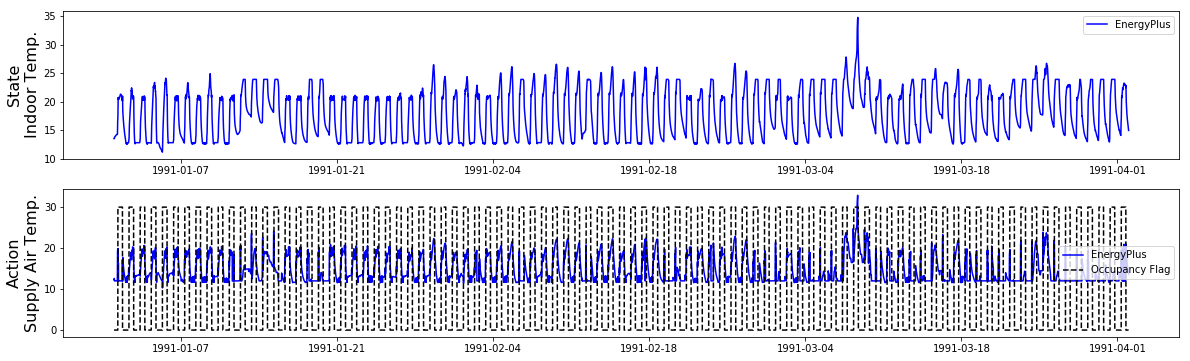

In [7]:
plotBaseline(obs_df)

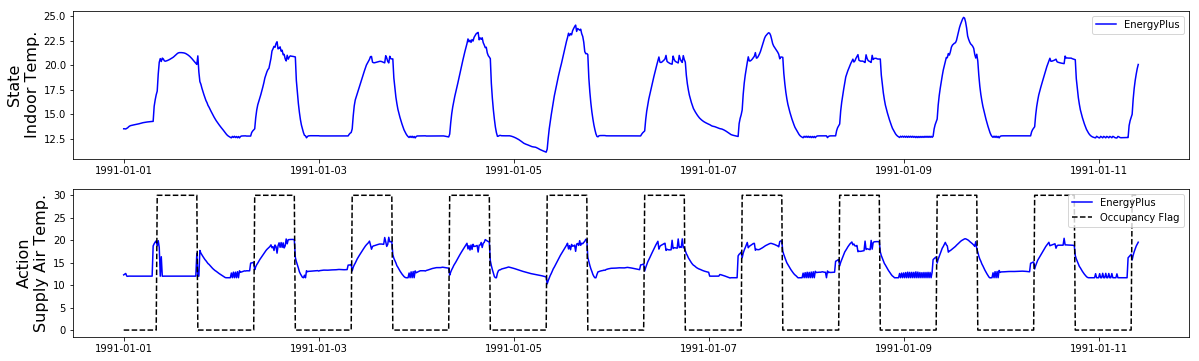

In [8]:
plotBaseline(obs_df[:1000])